In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Linear Regression and metric dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

#Stats model dependencies
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
filepath = "../data/processed/lr_df.pkl"

In [3]:
df = pd.read_pickle(filepath)

In [4]:
df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,10,1995,30,0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,12,1995,15,4
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,12,1995,22,4
5,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,12,1995,15,4
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,12,1995,22,4


## Linear Regression

In [5]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X = df.drop('revenue', axis=1)
X.head()

,budget,popularity,runtime,vote_average,vote_count,release_month,release_year,release_day,day_of_week
0,30000000.0,21.946943,81.0,7.7,5415.0,10,1995,30,0
1,65000000.0,17.015539,104.0,6.9,2413.0,12,1995,15,4
3,16000000.0,3.859495,127.0,6.1,34.0,12,1995,22,4
5,60000000.0,17.924927,170.0,7.7,1886.0,12,1995,15,4
8,35000000.0,5.231580,106.0,5.5,174.0,12,1995,22,4


In [7]:
y = df.revenue
y.head()

0    373554033.0
1    262797249.0
3     81452156.0
5    187436818.0
8     64350171.0
Name: revenue, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=12)

In [9]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
prediction = lm.predict(X_test)

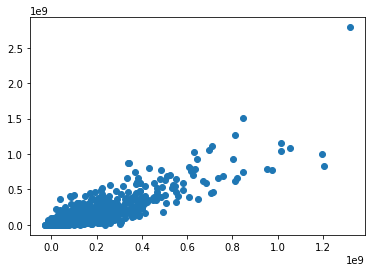

In [11]:
plt.figure()
plt.scatter(prediction, y_test)
#plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.show()

In [12]:
# Score the prediction with mse and r2
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 7525249494374660.0
R-squared (R2 ): 0.7477953764277135


In [13]:
lm.score(X_test,y_test)

0.7477953764277135

In [14]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 916628662.8103191


In [15]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 9


In [16]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,budget,1.818888e+00
1,popularity,6.543940e+05
2,runtime,8.193155e+03
3,vote_average,-3.471775e+05
4,vote_count,6.525727e+04
5,release_month,-1.709278e+05
6,release_year,-4.642806e+05
7,release_day,4.822214e+03
8,day_of_week,-1.749875e+06


## LM Performance

In [17]:
rss = np.sum((y_test - prediction) ** 2)
print(rss)

1.2145752683920701e+19


In [18]:
ess = np.sum((prediction - np.mean(y_test))**2)
print(ess)

3.603134781145836e+19


In [19]:
tss = rss + ess
print(tss)

4.817710049537906e+19


In [20]:
R2 = ess/tss
print(R2)

0.7478936557195742


In [21]:
#sklearn vs calculation
print(r2,R2)

0.7477953764277135 0.7478936557195742


In [22]:
#Number of observations
N = len(X_test)
print(N)

1614


In [23]:
#Number of variables
K = len(X.columns)
print(K)

9


In [24]:
#sklearn vs calculation
MSE = rss/(N-K-1)
print(mse, MSE)

7525249494374660.0 7572165014913156.0


In [25]:
MSR  = ess/K
print(MSR)

4.00348309016204e+18


In [26]:
f_stat = MSR/MSE
print(f_stat)

528.7104919500958


# Stats Model

## Budget vs Revenue

In [27]:
ml = ols('revenue ~ budget', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     6145.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:42:27   Log-Likelihood:            -1.0742e+05
No. Observations:                5380   AIC:                         2.148e+05
Df Residuals:                    5378   BIC:                         2.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.613e+06   1.96e+06     -1.846      0.0

## Popularity vs Revenue

[The Movie Database](https://developers.themoviedb.org/3/getting-started/popularity) describes popularity as basically how often a film is viewed and scored. It is used to boost their search results.
>This is their criteria:
* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score
 

In [28]:
ml = ols('revenue ~ popularity', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.43e-254
Time:                        16:42:27   Log-Likelihood:            -1.0889e+05
No. Observations:                5380   AIC:                         2.178e+05
Df Residuals:                    5378   BIC:                         2.178e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.855e+07   2.49e+06     15.474      0.0

## Vote count vs Revenue

In [29]:
ml = ols('revenue ~ vote_count', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     7862.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:42:27   Log-Likelihood:            -1.0704e+05
No. Observations:                5380   AIC:                         2.141e+05
Df Residuals:                    5378   BIC:                         2.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.541e+07   1.67e+06      9.210      0.0

* This Vote Count is most likely the same vote count used in Popularity, explaining the collinearity

## Release day vs Revenue

In [30]:
ml = ols('revenue ~ release_day', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.015
Date:                Mon, 07 Dec 2020   Prob (F-statistic):             0.0142
Time:                        16:42:27   Log-Likelihood:            -1.0947e+05
No. Observations:                5380   AIC:                         2.189e+05
Df Residuals:                    5378   BIC:                         2.189e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.031e+07   4.67e+06     17.184      

## Day of week vs Revenue

In [31]:
ml = ols('revenue ~ day_of_week', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.89e-29
Time:                        16:42:27   Log-Likelihood:            -1.0941e+05
No. Observations:                5380   AIC:                         2.188e+05
Df Residuals:                    5378   BIC:                         2.188e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.509e+08   5.82e+06     25.916      

### This hitogram shows that most films are released on a Friday, thus explaining why the day of the week has such little impact on revenue. 

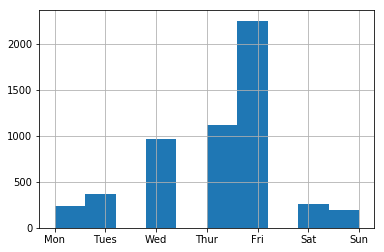

In [32]:
plt.figure()
df.day_of_week.hist()
plt.xticks(np.arange(7), ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

## Budget, Popularity, Vote count, Release day vs Revenue

In [33]:
ml = ols('revenue ~ budget + popularity + vote_count + release_day', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3396.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:42:27   Log-Likelihood:            -1.0608e+05
No. Observations:                5380   AIC:                         2.122e+05
Df Residuals:                    5375   BIC:                         2.122e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.077e+07   2.69e+06     -7.709      

## Total Model

In [34]:
ml = ols('revenue ~ budget + popularity + runtime + vote_average + vote_count + release_month + release_year + release_day + day_of_week', df).fit()
r_2 = ml.rsquared_adj
f = ml.f_pvalue
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1528.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:42:27   Log-Likelihood:            -1.0605e+05
No. Observations:                5380   AIC:                         2.121e+05
Df Residuals:                    5370   BIC:                         2.122e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.082e+09   1.62e+08      6.683

In [35]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,budget,1.818888e+00
1,popularity,6.543940e+05
2,runtime,8.193155e+03
3,vote_average,-3.471775e+05
4,vote_count,6.525727e+04
5,release_month,-1.709278e+05
6,release_year,-4.642806e+05
7,release_day,4.822214e+03
8,day_of_week,-1.749875e+06
